## Visualization

In [2]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
    library(magrittr); library(zeallot); library(glue); library(tidyverse); library(glue); library(lubridate)
    library(scales);library(reshape2); library(cowplot);library(RColorBrewer);
})

### Editors

In [3]:
file <- "metrics/metrics.tsv"
contributor <- read.csv(file,sep = '\t')
contributor$month <- as.Date(contributor$month, format = "%Y-%m-%d")

In [11]:
tail(contributor,13)

,month,active_editors,global_south_active_editors,global_south_edits,global_south_new_editor_retention,global_south_nonbot_edits,mobile.heavy_wiki_active_editors,mobile.heavy_wiki_edits,mobile.heavy_wiki_new_editor_retention,mobile.heavy_wiki_nonbot_edits,⋯,net_new_Wikipedia_articles,net_new_content_pages,new_active_editors,new_editor_retention,other_nonbot_edits,returning_active_editors,revert_rate,total_edits,uploads,wikidata_edits
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
213,2018-08-01,78792,NA,NA,0.04785500,NA,3741,1210820,0.04700795,481644,⋯,221579,1818411,13947,0.05151272,11394260,64845,0.08442085,40995731,797032,18208668
214,2018-09-01,82328,20109,2070328,0.04832000,2070326,3863,846503,0.05068545,437457,⋯,185644,1635067,18270,0.05681354,11062745,64058,0.09307746,38605571,830428,17786725
215,2018-10-01,82405,19891,1979771,NA,1979769,3825,957794,0.05048498,433507,⋯,191087,2101982,16518,0.06641143,10790092,65887,0.09818926,43486666,582738,23073044
216,2018-11-01,82235,20008,2015177,0.04200000,2015175,3639,1150793,0.04332890,456985,⋯,192340,2268787,15506,0.06874217,11038500,66729,0.09374739,44376013,586129,23896534
217,2018-12-01,80796,20359,2067577,0.04100000,2067577,4046,1125381,0.04704514,488735,⋯,186233,2128146,14662,0.07207374,10991655,66134,0.08547773,41988394,546299,21418466
218,2019-01-01,86782,21367,2434941,0.03839281,2434941,4228,988233,0.04335825,512674,⋯,200366,1938938,17096,0.05423185,12143464,69686,0.08130336,46312638,580719,23213770
219,2019-02-01,82554,19743,2241877,0.04347225,2241875,3901,966696,0.04547853,438437,⋯,195100,1455387,16335,0.05465257,10952758,66219,0.07375803,44135189,531456,22667003
220,2019-03-01,87711,21679,2294512,0.04577446,2294512,4252,996968,0.04395047,465084,⋯,216257,1587804,17738,0.07326752,11748062,69973,0.06309033,49434627,542547,28490299
221,2019-04-01,84358,19941,2053568,0.04010374,2052287,3996,1412904,0.04376658,414992,⋯,268254,1782113,15535,0.06862974,10955991,68823,0.05577760,51252861,616226,30126989


In [4]:
editors_fy <- contributor %>% 
     select(month,active_editors,new_active_editors,returning_active_editors) %>%
     filter(month >= '2016-07-01') %>%
    # filter(month < '2019-07-01') %>%
     mutate(fiscal_year = ifelse(month >= '2017-07-01' & month < '2018-07-01', 'FY 2017/18', ifelse(month <'2017-07-01','FY 2016/17',ifelse(month <'2019-07-01','FY 2018/19','FY 2019/20'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

editors_fy$MonthN = factor(editors_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

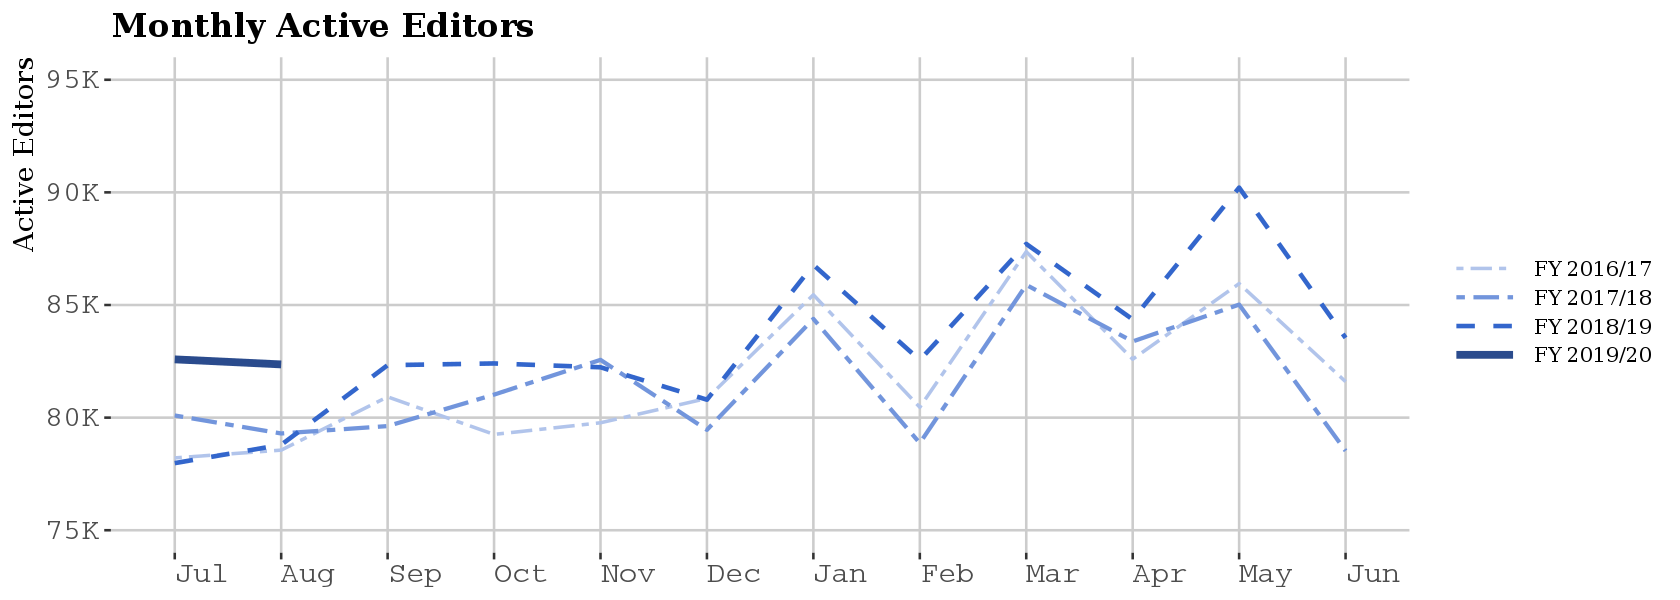

In [13]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- ggplot(editors_fy,aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = active_editors, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    #geom_point(x=01, y=82600 , size = 4, color = '#2a4b8d') +
    #geom_text(aes(x =01, y=84000, label="July 2019"),hjust=0, vjust=0, size= 5) +  
    scale_size_manual(values = c(1,1.2,1.3,2.2)) +
    scale_color_manual(values = c("FY 2016/17"= "#b1c4eb","FY 2017/18" = "#7295dc", "FY 2018/19" = "#3366cc","FY 2019/20" = "#2a4b8d")) +
    scale_linetype_manual(values=c("twodash","twodash", "dashed","solid")) +
    scale_x_discrete(breaks = editors_fy$MonthN, labels = editors_fy$Month) +
    scale_y_continuous("Active Editors", labels = polloi::compress,limits = c(75E3, 95E3)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text=element_text( hjust = 0,size = 18,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          #legend.position = c(0.1, 0.8), legend.title = element_blank(),legend.text =element_text( hjust = 0,size =10),
          #legend.background = element_rect(fill="grey90",size=0.8,linetype="solid"),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Active Editors") 

p1

#ggsave(filename="Monthly Active Editors.png", plot = p1, path = 'Figures', units = "in", dpi = 192, height = 2, width = 14, limitsize = FALSE)  


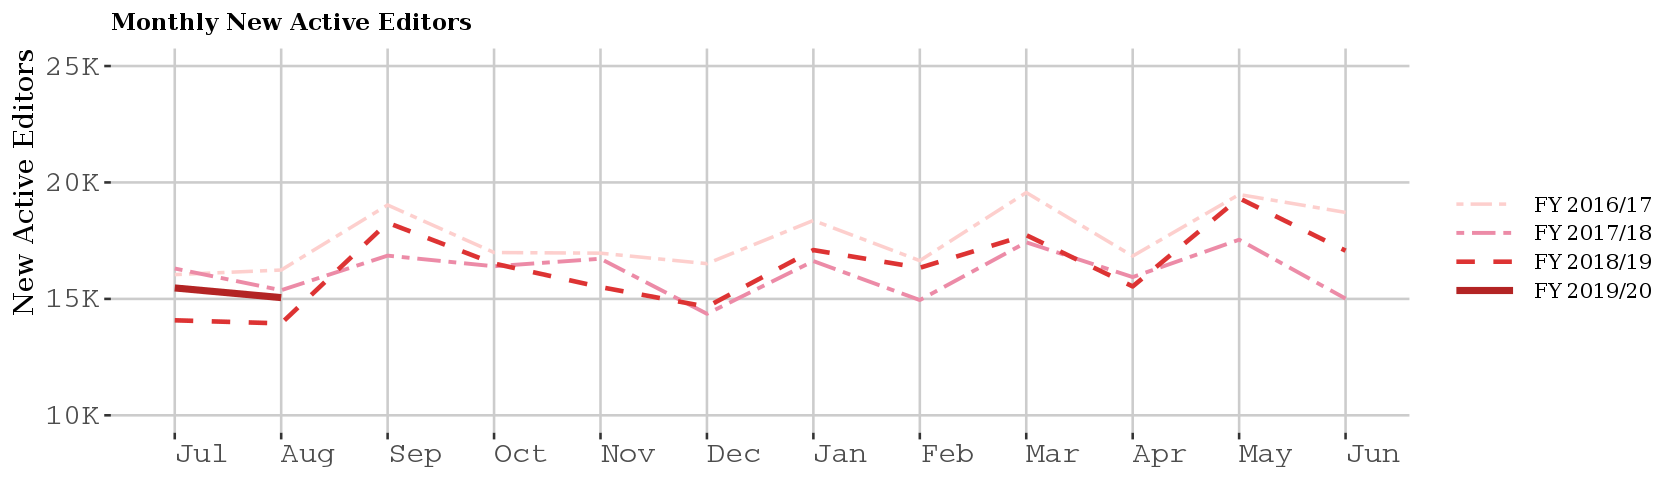

In [24]:
options(repr.plot.width = 14, repr.plot.height = 4)

p2 <- ggplot(editors_fy,aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = new_active_editors, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    #geom_point(x=01, y=15500 , size = 4, color = '#b32424') +
    #geom_text(aes(x =01, y=15000, label="July 2019"),hjust=0, vjust=0, size= 5) +  
    scale_size_manual(values = c(1,1.1,1.3,2)) +
    scale_color_manual(values = c("FY 2016/17"= "#fdcfcd","FY 2017/18" = "#ec8ba7", "FY 2018/19" = "#dd3333","FY 2019/20" = "#b32424")) +
    scale_linetype_manual(values=c("twodash","twodash", "dashed","solid")) +
    scale_x_discrete("Month",
                      breaks = editors_fy$MonthN, 
                     labels = editors_fy$Month) +
    scale_y_continuous("New Active Editors",labels = polloi::compress,limits = c(10E3, 25E3)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),axis.text=element_text( hjust = 0,size = 18,family="Courier"),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 14,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          #legend.position = c(0.1, 0.8), legend.title = element_blank(),legend.text =element_text( hjust = 0,size = 11),
          #legend.background = element_rect(fill="grey90",size=0.8,linetype="solid"),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly New Active Editors") 

p2

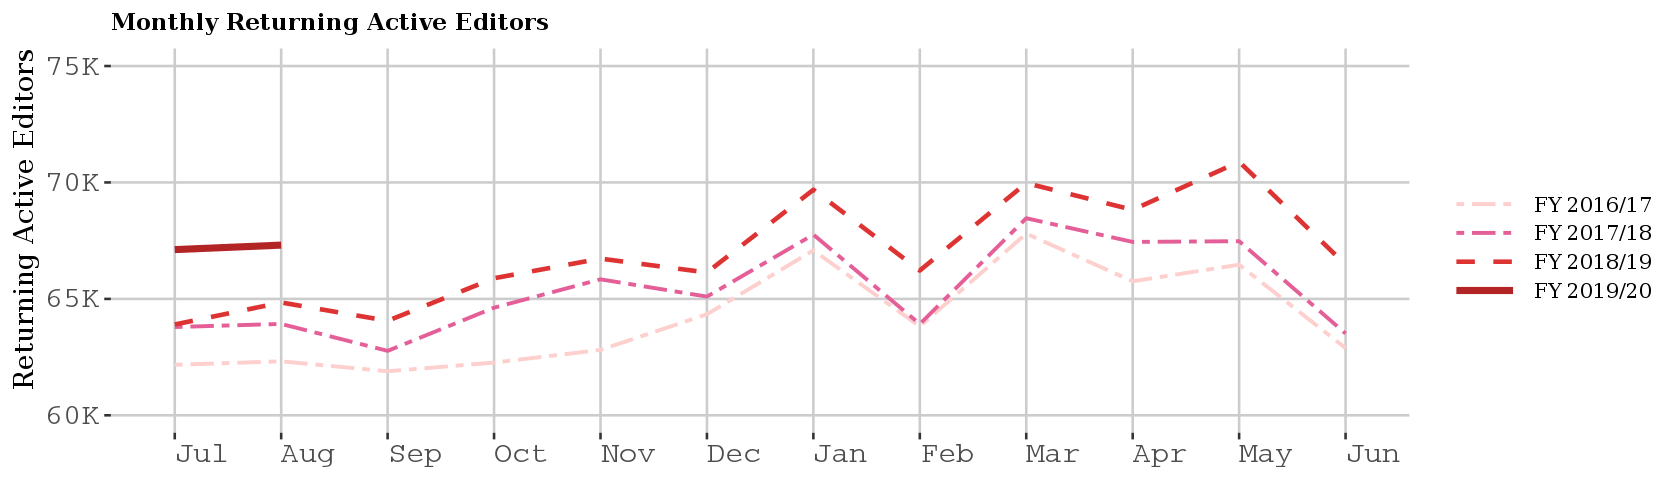

In [25]:
options(repr.plot.width = 14, repr.plot.height = 4)

p3 <- ggplot(editors_fy,aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = returning_active_editors, group=fiscal_year, color = fiscal_year,linetype = fiscal_year,size=fiscal_year)) +
    #geom_point(x=01, y=67100 , size = 4, color = '#b32424') +
    #geom_text(aes(x =01, y=67800, label="July 2019"),hjust=0, vjust=0, size= 5) + 
    scale_size_manual(values = c(1.1,1.1,1.3,2)) +
    scale_color_manual(values = c("FY 2016/17"= "#fdcfcd","FY 2017/18" = "#e45f97", "FY 2018/19" = "#dd3333","FY 2019/20" = "#b32424")) +
    scale_linetype_manual(values=c("twodash","twodash", "dashed","solid")) +
    scale_x_discrete("Month",breaks = editors_fy$MonthN, labels = editors_fy$Month) +
    scale_y_continuous("Returning Active Editors", labels = polloi::compress,limits = c(60E3, 75E3)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
     theme(axis.title.x=element_blank(),axis.text=element_text( hjust = 0,size = 18,family="Courier"),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 14,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          #legend.position = c(0.1, 0.8), legend.title = element_blank(),legend.text =element_text( hjust = 0,size = 11),
          #legend.background = element_rect(fill="grey90",size=0.8,linetype="solid"),
           legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Returning Active Editors")

p3

## Edits

In [40]:
edit_fy <- contributor %>% 
     select(month,total_edits,uploads,wikidata_edits) %>%
     filter(month >= '2017-07-01') %>%
    # filter(month < '2019-07-01') %>%
     mutate(fiscal_year = ifelse(month >= '2017-07-01' & month < '2018-07-01', 'FY 2017/18', ifelse(month <'2019-07-01','FY 2018/19','FY 2019/20')),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

edit_fy$MonthN = factor(edit_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

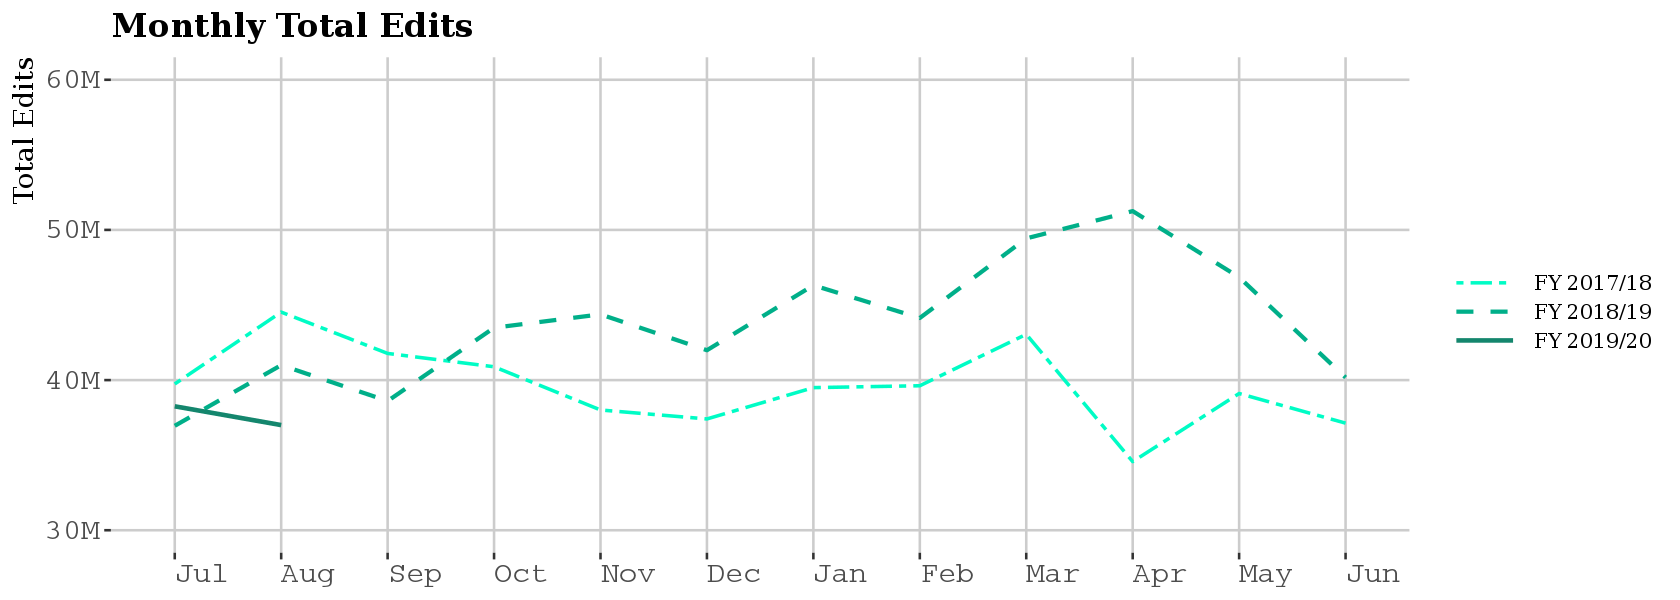

In [17]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- ggplot(edit_fy,aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = total_edits, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    #geom_point(x=01, y=82600 , size = 4, color = '#2a4b8d') +
    #geom_text(aes(x =01, y=84000, label="July 2019"),hjust=0, vjust=0, size= 5) +  
    scale_size_manual(values = c(1,1.2,1.3,2.2)) +
    scale_color_manual(values = c("FY 2017/18" = "#00fcc5", "FY 2018/19" = "#00af89","FY 2019/20" = "#14866d")) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete(breaks = edit_fy$MonthN, labels = edit_fy$Month) +
    scale_y_continuous("Total Edits", labels = polloi::compress,limits = c(30E6, 60E6)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text=element_text( hjust = 0,size = 18,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          #legend.position = c(0.1, 0.8), legend.title = element_blank(),legend.text =element_text( hjust = 0,size =10),
          #legend.background = element_rect(fill="grey90",size=0.8,linetype="solid"),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Total Edits") 

p1

#ggsave(filename="Monthly Active Editors.png", plot = p1, path = 'Figures', units = "in", dpi = 192, height = 2, width = 14, limitsize = FALSE)  


In [25]:
edit_type <- contributor %>% 
     select(month,uploads,wikidata_edits,mobile_edits) %>%
     filter(month >= '2016-07-01') 

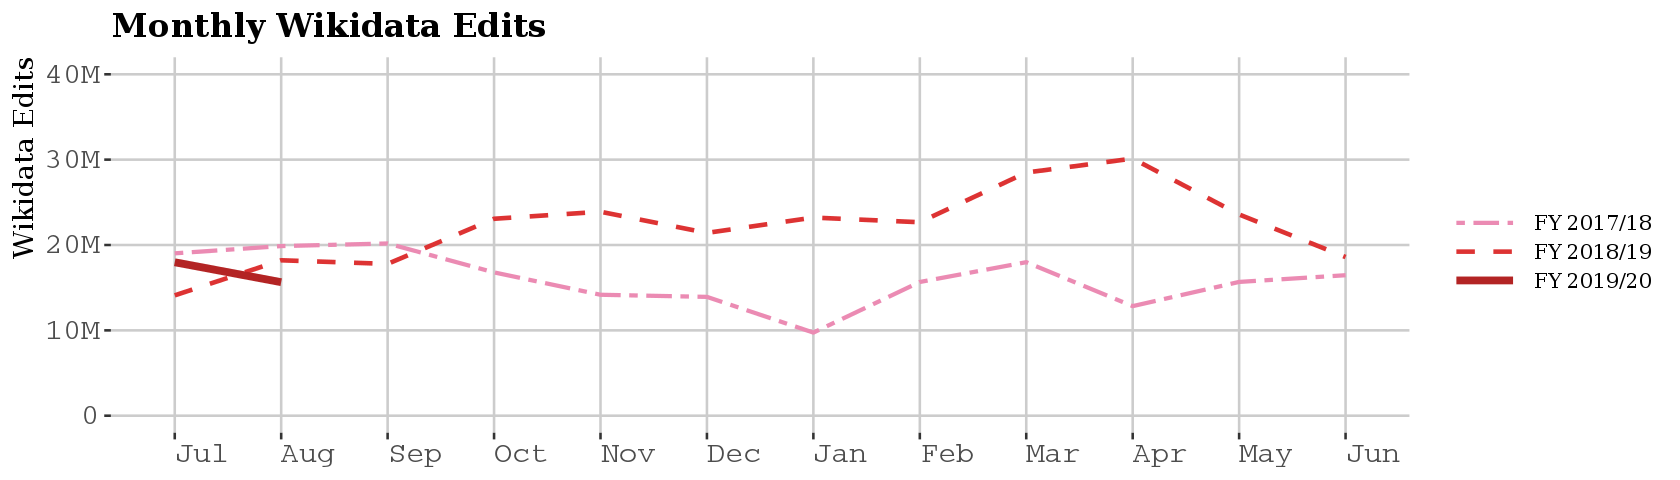

In [63]:
options(repr.plot.width = 14, repr.plot.height = 4)

p1 <- ggplot(edit_fy,aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = wikidata_edits, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    #geom_point(x=01, y=82600 , size = 4, color = '#2a4b8d') +
    #geom_text(aes(x =01, y=84000, label="July 2019"),hjust=0, vjust=0, size= 5) +  
    scale_size_manual(values = c(1.2,1.3,2.2)) +
    scale_color_manual(values = c("FY 2017/18" = "#eb8bb3", "FY 2018/19" = "#dd3333","FY 2019/20" = "#b32424")) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete(breaks = edit_fy$MonthN, labels = edit_fy$Month) +
    scale_y_continuous("Wikidata Edits", labels = polloi::compress,limits = c(0, 40E6)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text=element_text( hjust = 0,size = 18,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          #legend.position = c(0.1, 0.8), legend.title = element_blank(),legend.text =element_text( hjust = 0,size =10),
          #legend.background = element_rect(fill="grey90",size=0.8,linetype="solid"),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Wikidata Edits") 

p1

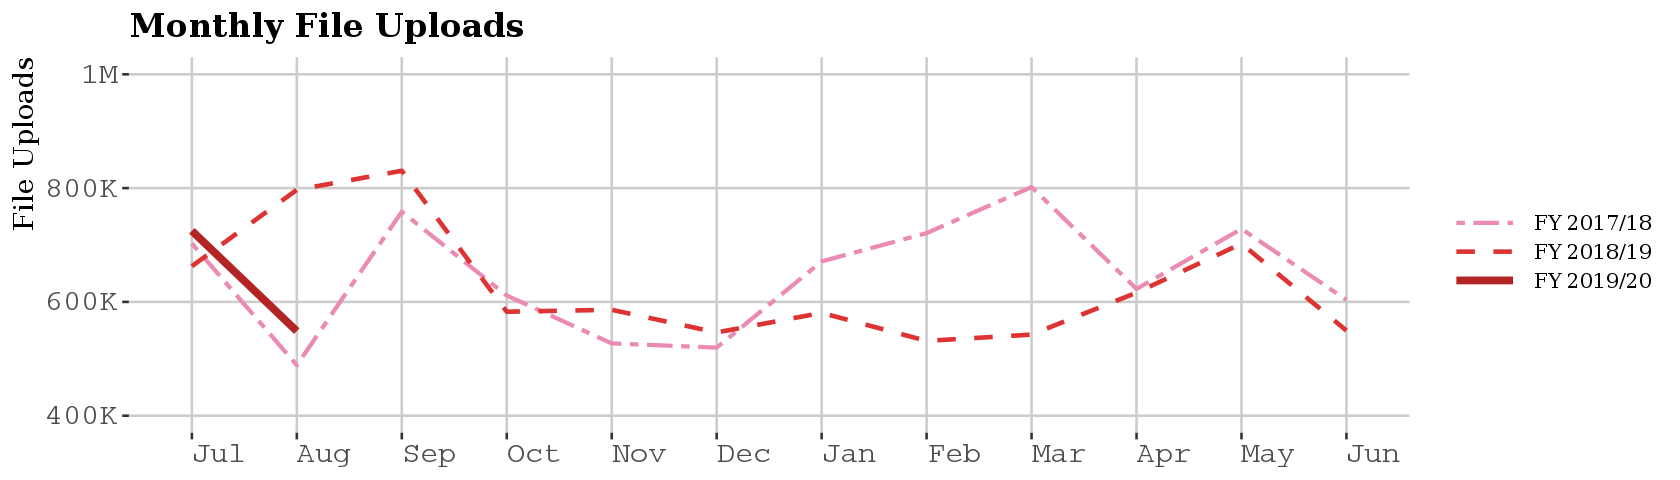

In [64]:
options(repr.plot.width = 14, repr.plot.height = 4)

p1 <- ggplot(edit_fy,aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = uploads, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    #geom_point(x=01, y=82600 , size = 4, color = '#2a4b8d') +
    #geom_text(aes(x =01, y=84000, label="July 2019"),hjust=0, vjust=0, size= 5) +  
    scale_size_manual(values = c(1.2,1.3,2.2)) +
    scale_color_manual(values = c("FY 2017/18" = "#eb8bb3", "FY 2018/19" = "#dd3333","FY 2019/20" = "#b32424")) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete(breaks = edit_fy$MonthN, labels = edit_fy$Month) +
    scale_y_continuous("File Uploads", labels = polloi::compress,limits = c(40E4, 1E6)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text=element_text( hjust = 0,size = 18,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          #legend.position = c(0.1, 0.8), legend.title = element_blank(),legend.text =element_text( hjust = 0,size =10),
          #legend.background = element_rect(fill="grey90",size=0.8,linetype="solid"),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly File Uploads") 

p1